In [43]:
import numpy as pd # linear algebra operations
import pandas as pd # used for data prepartion
import seaborn as sns
from textblob import TextBlob #used for sentiment analysis
# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


data = pd.read_csv("/content/Customers.csv")

In [2]:
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [4]:
data.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
data.describe(include= 'object')

,Gender,Profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


In [7]:
data.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [8]:
# Mengakses baris berdasarkan label
print(data.loc[0])  # Mengakses baris pertama

CustomerID                         1
Gender                          Male
Age                               19
Annual Income ($)              15000
Spending Score (1-100)            39
Profession                Healthcare
Work Experience                    1
Family Size                        4
Name: 0, dtype: object


In [13]:
# Mengakses baris dan kolom berdasarkan label
print(data.loc[0, 'Profession'])  # Mengakses nilai di baris pertama, kolom 'column_name'

Healthcare


In [14]:
# Mengakses baris berdasarkan posisi/indeks
print(data.iloc[0])  # Mengakses baris pertama

CustomerID                         1
Gender                          Male
Age                               19
Annual Income ($)              15000
Spending Score (1-100)            39
Profession                Healthcare
Work Experience                    1
Family Size                        4
Name: 0, dtype: object


In [15]:
# Mengakses baris dan kolom berdasarkan posisi/indeks
print(data.iloc[0, 1])  # Mengakses nilai di baris pertama, kolom kedua (indeks 1)

Male


In [16]:
data.loc[50:100, 'Gender':'Profession']

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession
50,Female,49,88000,52,Artist
51,Male,33,97000,60,Artist
52,Female,31,74000,54,Artist
53,Male,59,68000,60,Entertainment
54,Female,50,18000,45,Marketing
55,Male,47,95000,41,Artist
56,Female,51,71000,50,Healthcare
57,Male,69,8000,46,Doctor
58,Female,27,57000,51,Artist
59,Male,53,89000,46,Lawyer


In [17]:
data.groupby(['Profession']).size()

Profession
Artist           612
Doctor           161
Engineer         179
Entertainment    234
Executive        153
Healthcare       339
Homemaker         60
Lawyer           142
Marketing         85
dtype: int64

In [18]:
data.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [20]:
data.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [21]:
data_cleaned = data.dropna()

In [22]:
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [24]:
# Menghapus kolom tertentu dari DataFrame
columns_to_drop = ['Annual Income ($)']  # Daftar kolom yang akan dihapus
data_without_columns = data.drop(columns=columns_to_drop)

In [25]:
# Menampilkan DataFrame setelah menghapus kolom tertentu
print("DataFrame setelah menghapus kolom tertentu:")
print(data_without_columns.head())

DataFrame setelah menghapus kolom tertentu:
   CustomerID  Gender  Age  Spending Score (1-100)     Profession  \
0           1    Male   19                      39     Healthcare   
1           2    Male   21                      81       Engineer   
2           3  Female   20                       6       Engineer   
3           4  Female   23                      77         Lawyer   
4           5  Female   31                      40  Entertainment   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  


In [28]:
data.loc[0:2000, 'Annual Income ($)'] = 0.1
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,0.1,39,Healthcare,1,4
1,2,Male,21,0.1,81,Engineer,3,3
2,3,Female,20,0.1,6,Engineer,1,1
3,4,Female,23,0.1,77,Lawyer,0,2
4,5,Female,31,0.1,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,0.1,40,Artist,8,7
1996,1997,Female,91,0.1,32,Doctor,7,7
1997,1998,Male,87,0.1,14,Healthcare,9,2
1998,1999,Male,77,0.1,4,Executive,7,2


<Axes: xlabel='count', ylabel='Gender'>

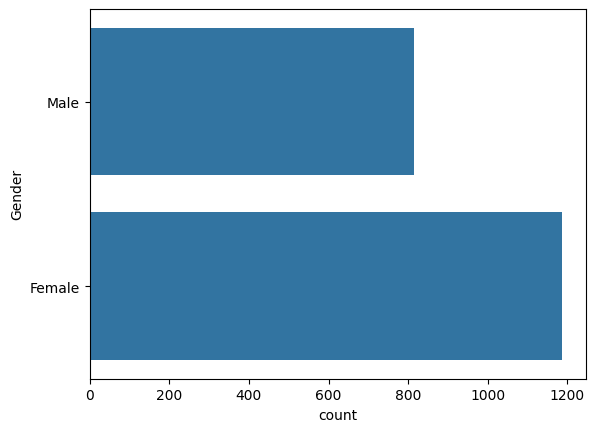

In [29]:
sns.countplot(data['Gender'])

<Axes: xlabel='count', ylabel='Profession'>

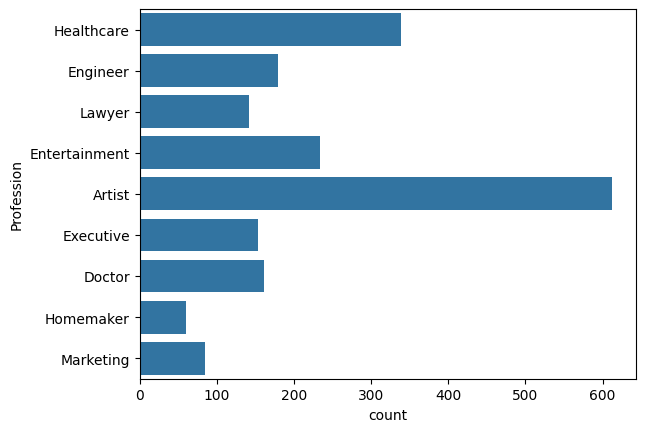

In [30]:
sns.countplot(data['Profession'])

In [45]:
# Obtain the count of each gender in the dataset
gender_count = data['Gender'].value_counts()

# Create a pie chart to visualize the distribution of gender in the dataset
fig = px.pie(values=gender_count, names=gender_count.index)

# Enhance the plot by adding a title and labels
fig.update_layout(title="Distribution of Gender in the Dataset")

# Create a bar chart to visualize the distribution of gender in the dataset
fig2 = px.bar(y=gender_count, x=gender_count.index, color=gender_count.index)

# Display the plot
fig.show()
fig2.show()

In [46]:

# Create a box plot of Age by Gender
age_gender_boxplot = px.box(data, x='Gender', y='Age', color='Gender', title='Distribution of Age by Gender')

# Display the plot
age_gender_boxplot.show()

In [47]:
# Create a box plot of Age by Gender
anual_income_gender_boxplot = px.box(data, x='Gender', y='Annual Income ($)', color='Gender', title='Distribution of Anual Income ($) by Gender')

# Display the plot
anual_income_gender_boxplot.show()

In [49]:
# Create a histogram of the 'Age' column, and include the Violin plot to show the distribution
fig = px.histogram(data, x='Age', marginal='violin')

# Display the plot
fig.show()


In [52]:
# Create violin plot for Age versus Profession
fig1 = px.violin(data, x='Age', y='Profession', color='Profession', title='Age Distribution across Professions')

# Create box plot for Age versus Profession
fig2 = px.box(data, x='Age', y='Profession', color='Profession', title='Age Distribution across Professions')

# Display the plots
fig1.show()
fig2.show()

In [54]:
# Create a density contour plot to show the relationship between age and work experience
fig1 = px.density_contour(data, x='Age', y='Work Experience', title='Density Contour Plot')

# Create a density heatmap to show the distribution of age and work experience
fig2 = px.density_heatmap(data, x='Age', y='Work Experience', title='Density Heatmap')

# Show the plots
fig1.show()
fig2.show()


In [55]:
# Create a histogram of the 'Age' column, and include the Violin plot to show the distribution
fig = px.histogram(data, x='Annual Income ($)', marginal='violin')

# Display the plot
fig.show()

In [57]:
# Create a box plot for annual income grouped by profession
fig = px.box(data, y='Annual Income ($)', x='Profession', color="Profession")

# Set the title of the plot
fig.update_layout(title_text='Annual Income Distribution by Profession')

# Show the plot
fig.show()

In [60]:
# Create a histogram of the 'Age' column, and include the Violin plot to show the distribution
fig = px.histogram(data, x='Spending Score (1-100)', marginal='box')

# Display the plot
fig.show()

In [61]:
# Extracting the count of each profession from the dataframe and storing in profession_dis
profession_dis = data.Profession.value_counts()

# Extracting the names of each profession from the profession_dis index
names = profession_dis.index

# Creating a pie chart to visualize the distribution of profession data values
fig = px.pie(values=profession_dis, names=names, color=names)

# Setting the title of the plot
fig.update_layout(title_text='Distribution of Profession Data Values')

# Displaying the plot
fig.show()

In [62]:
# Create a box plot for annual income grouped by profession
fig = px.box(data, y='Work Experience', x='Profession', color="Gender")

# Set the title of the plot
fig.update_layout(title_text='Annual Income Distribution by Profession')

# Show the plot
fig.show()

Data preprocessing


In [63]:
# define the categorical columns.
categorical_columns = ['Gender', 'Profession']

# define the remarkable columns.
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

In [65]:
# Convert or categorical columns to numerical columns.
for cat_col in categorical_columns:

    # Initialise label encoder.
    encoder = LabelEncoder()

    # Apply transformation.
    data[cat_col] = encoder.fit_transform(data[cat_col])

In [66]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


In [68]:
# Initialise standard scalar.
scaler = StandardScaler()

# Rescaled data.
data.drop(columns=['CustomerID'], inplace=True)
full_data = scaler.fit_transform(data)

In [69]:
# Quick Look
full_data[:5]

array([[ 1.20706357, -1.05408932, -2.09350095, -0.42833854,  0.77835593,
        -0.79120713,  0.11749744],
       [ 1.20706357, -0.98372287, -1.65613312,  1.07554599, -0.35434734,
        -0.28116224, -0.39005088],
       [-0.82845678, -1.0189061 , -0.54084515, -1.6099621 , -0.35434734,
        -0.79120713, -1.40514752],
       [-0.82845678, -0.91335643, -1.13129172,  0.93231889,  1.53349144,
        -1.04622958, -0.8975992 ],
       [-0.82845678, -0.63189066, -1.59052794, -0.39253176,  0.02322042,
        -0.53618469,  1.13259408]])

Data corelation

In [70]:
# Calculate correlation
corr = data.corr()

# Create the correlation matrix heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr.values,
                   x=corr.columns,
                   y=corr.columns,
                   colorscale='Viridis',
                   colorbar=dict(title='Correlation')))

# Update heatmap layout
fig.update_layout(title='Correlation Matrix Heatmap',
                  xaxis=dict(side='top'))

# Show the figure
fig.show()


Principal Component Analysis

In [72]:
# Instantiate a PCA object with 2 components for 2D data
pca_2D = PCA(n_components=2, random_state=42)

# Fit and transform the data to obtain the 2D projection
data_2D = pca_2D.fit_transform(full_data)


# Instantiate a PCA object with 3 components for 3D data
pca_3D = PCA(n_components=3, random_state=42)

# Fit and transform the data to obtain the 3D projection
data_3D = pca_3D.fit_transform(full_data)

In [73]:
# create a list to store the sum of squared distances for each k
ssd = []

# fit KMeans clustering with different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data)
    ssd.append(kmeans.inertia_)

# create a dataframe with the k values and corresponding ssd
df = pd.DataFrame({'k': range(1, 11), 'ssd': ssd})

# create the line plot using Plotly Express
fig = px.line(df, x='k', y='ssd', title='Elbow Method')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()

Silhouette Method

In [75]:
# create a list to store the Calinski-Harabasz scores for each k
scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data)
    score = calinski_harabasz_score(full_data, kmeans.labels_)
    scores.append(score)

# create a dataframe with the k values and corresponding scores
df = pd.DataFrame({'No. of clusters(k)': range(2, 11), 'Calinski-Harabasz Score': scores})

# create the line plot using Plotly Express
fig = px.line(df, x='No. of clusters(k)', y='Calinski-Harabasz Score', title='Calinski-Harabasz Index')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()

In [76]:
# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model on train_ds
kmeans.fit(full_data)

# Obtain cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [77]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2],
    color=labels,
    size_max=5,
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    color_continuous_scale=['black', 'cyan'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter3d(
        x=centroids[:,0],
        y=centroids[:,1],
        z=centroids[:,2],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=10,
            color='orange',
            opacity=0.8,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()

In [78]:
# Create the 2D scatter plot
fig = px.scatter(
    x=data_2D[:, 0], y=data_2D[:, 1],
    color=labels,
    size_max=5,
    opacity=0.7,
    labels={'x':'X', 'y':'Y'},
    color_continuous_scale=['black', 'cyan'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter(
        x=centroids[:,0],
        y=centroids[:,1],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=20,
            color='orange',
            opacity=1.0,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()

In [79]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
model = DBSCAN(eps=0.7, min_samples=5)
model.fit(full_data)

# Obtail labels
labels = model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)          # -1 stands for noise in the data i.e. outliers

# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2],
    color=labels,
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    size_max=5,
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    title=f'DBSCAN Clustering({n_clusters} Clusters)')

# Show the plot
fig.show()

In [80]:
# Define the labels and their corresponding opacity values
label_opacity = {
    0: 1.0,        # opacity for label 0
    1: 1.0,        # opacity for label 1
    2: 1.0,        # opacity for label 2
    -1: 0.3        # opacity for label -1
}

# Create separate traces for each label with the corresponding opacity values
traces = []
for label in set(labels):
    opacity = label_opacity[label]
    mask = labels == label
    trace = go.Scatter(
        x=data_2D[mask, 0], y=data_2D[mask, 1],
        mode='markers',
        marker=dict(
            size=5*(opacity*5),
            opacity=opacity
        ),
        name=f'Label {label}'
    )
    traces.append(trace)

# Create the plot
fig = go.Figure(data=traces, layout=go.Layout(
    title='DBSCAN Clustering',
    xaxis_title='X',
    yaxis_title='Y'
))

# Show the plot
fig.show()


In [38]:
data['Age'].mean()

48.96

In [39]:
data['Age'].median()

48.0

In [40]:
data['Age'].mode()

0    31
Name: Age, dtype: int64

In [41]:
kolom_khusus ='Age'
rata_rata =data[kolom_khusus].mean()
simpangan_rata_rata = (data[kolom_khusus] - rata_rata).abs().mean()

print(f"Simpangan rata-rata pada kolom {kolom_khusus}:{simpangan_rata_rata}")

Simpangan rata-rata pada kolom Age:24.58372


In [42]:
kolom_khusus = 'Age'
simpangan_baku = data[kolom_khusus].std()

print(f"Simpangan baku pada kolom {kolom_khusus}: {simpangan_baku}")

Simpangan baku pada kolom Age: 28.42974718956592
